In [39]:
#NOTE: Before Starting, you must register at www.tng-project.org/data and obtain an API key
#Edit the file "load_api_key.py" with your API key
#Then, add it to .gitignore ("echo load_api_key.py > .gitignore") before committing any changes.

import tng_api_utils as tau
import matplotlib
import matplotlib.pyplot as pyplot
%matplotlib inline

In [43]:
#obtain pristine mock image from IllustrisTNG data release
#specify simulation
sim='TNG100-1'
#specify snapshot (redshift) and galaxy id (aka SubFind ID or sfid)
#we can select catalogs of these two quantities to iterate over to prepare new training sets
#not the fastest thing in the world, but super easy
snap=50
sfid=10

filter_key='stellarBandObsFrame-wfc3_ir_f160w'

mag=tau.get_subhalo_magnitude(sim=sim,snap=snap,sfid=sfid,partField=filter_key)
print(mag)

#size = size in arcsec
image_size=0.2

#Optionally, use desired image size (arcmin) plus desired pixel scale (arcsec), to set nPixels
# e.g.
desired_image_size=image_size
pixel_size=0.11
#generally, image_size/pixel_size is not an integer, use "ceil" to get FOV with next highest integer number of pixels
n_pix=np.int64(np.ceil(desired_image_size*60/pixel_size))
#use more accurate final image size owing to above step
image_size=pixel_size*n_pix/60.0

pristine_hdu=tau.get_subhalo_mockdata_as_fits(sim=sim,snap=snap,sfid=sfid,partField=filter_key,
                                              nPixels=n_pix,
                                              size=image_size)
print(pristine_hdu.header.cards)


#useful, related utility:
#snap_dict = tau.get(tau.baseUrl+'/'+sim+'/snapshots/'+str(snap))
#redshift=snap_dict['redshift']


15.470515277570724
('XTENSION', 'IMAGE', 'Image extension')
('BITPIX', -32, 'array data type')
('NAXIS', 2, 'number of array dimensions')
('NAXIS1', 110, '')
('NAXIS2', 110, '')
('PCOUNT', 0, 'number of parameters')
('GCOUNT', 1, 'number of groups')
('EXTNAME', 'MockData', '')
('SIM', 'TNG100-1', '')
('SNAP', 50, '')
('SFID', 10, '')
('PTYPE', 'stars', '')
('PFIELD', 'stellarBandObsFrame-wfc3_ir_f160w', '')
('N_ARCMIN', 0.20166666666666666, '')
('NPIXELS', 110, '')
('AXES', '0,1', '')
('PIXSCALE', 0.11, 'arcsec')
('ORIGUNIT', 'mag/arcsec^2', 'downloaded units')
('BUNIT', 'nanoJanskies', 'final units')


In [24]:
#convolve with simple PSF model
psf_hdu=tau.convolve_with_fwhm(pristine_hdu,fwhm_arcsec=0.15)

In [30]:
#add simple noise model
psfnoise_hdu=tau.add_simple_noise_extractedsn(psf_hdu,extractedsn=25)

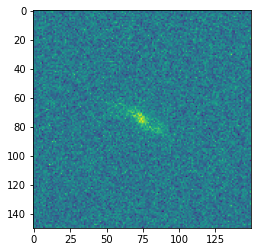

In [31]:
#visualize
pyplot.imshow(psfnoise_hdu.data)

In [35]:
#save data
pri=fits.PrimaryHDU(pristine_hdu.data,header=pristine_hdu.header)
hdulist=fits.HDUList([pri,psf_hdu,psfnoise_hdu])
hdulist.writeto('tng_example_mock.fits')

In [44]:
#After this step is probably when you would want to resize/reshape before feeding to CNNs...